In [181]:
# References:
# https://becominghuman.ai/ensemble-learning-bagging-and-boosting-d20f38be9b1e
# https://towardsdatascience.com/adaboost-for-dummies-breaking-down-the-math-and-its-equations-into-simple-terms-87f439757dcf
# Class notes and lecture examples provide on blackboard

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import sklearn.metrics as metrics
import statsmodels.api as stats
import random
from sklearn.linear_model import LogisticRegression

In [183]:
fiveRingData=pd.read_csv('E:\Local Disk D\IIT-C\Sem 4\CS 584 Machine Learning\Homeworks\Homework 5\FiveRing.csv')

fiveRingDataFrame=pd.DataFrame(fiveRingData)

In [184]:
fiveRingDataFrame.head()

,ring,x,y
0,0,0.000000,1.000000
1,0,0.001877,1.061234
2,0,0.001877,0.938766
3,0,0.002810,1.074915
4,0,0.002810,0.925085


In [185]:
# trainData=(fiveRingDataFrame[[ 'x','y']]).apply(lambda i: i.astype('category'))
trainData=fiveRingDataFrame[[ 'x','y']]

targetVariable= fiveRingDataFrame['ring'].astype('category')

y = targetVariable

y_category = y.cat.categories


# print(y)
print(y_category,"\n")
# X= pd.get_dummies(trainData)



Int64Index([0, 1, 2, 3, 4], dtype='int64') 



In [186]:
X= trainData

# X= pd.get_dummies(trainData)

X = stats.add_constant(X,prepend=True)

print(X.head())

   const         x         y
0    1.0  0.000000  1.000000
1    1.0  0.001877  1.061234
2    1.0  0.001877  0.938766
3    1.0  0.002810  1.074915
4    1.0  0.002810  0.925085


In [187]:
logit = stats.MNLogit(y, X)

print("Name of Target Variable:", logit.endog_names)

print("Name(s) of Predictors:", logit.exog_names)

fitModel = logit.fit(method='newton', full_output = True, maxiter = 1000, tol = 1e-8)
modelParameter = fitModel.params

print("Model Parameter Estimates:\n", modelParameter)

print("Model Log-Likelihood Value:\n", logit.loglike(modelParameter.values))

Name of Target Variable: ring
Name(s) of Predictors: ['const', 'x', 'y']
Optimization terminated successfully.
         Current function value: 1.120803
         Iterations 7
Model Parameter Estimates:
               0         1         2         3
const -4.435535  0.187691 -2.701434 -8.702577
x      2.953259 -1.467861  1.455439  4.438213
y      0.000669  0.720070  0.694733  0.719375
Model Log-Likelihood Value:
 -22427.266008737428


In [188]:
round(modelParameter,4)

,0,1,2,3
const,-4.4355,0.1877,-2.7014,-8.7026
x,2.9533,-1.4679,1.4554,4.4382
y,0.0007,0.7201,0.6947,0.7194


In [189]:
print("1(a)")

print(fitModel.summary())

1(a)
                          MNLogit Regression Results                          
Dep. Variable:                   ring   No. Observations:                20010
Model:                        MNLogit   Df Residuals:                    19998
Method:                           MLE   Df Model:                            8
Date:                Tue, 30 Apr 2019   Pseudo R-squ.:                  0.3036
Time:                        21:54:24   Log-Likelihood:                -22427.
converged:                       True   LL-Null:                       -32204.
                                        LLR p-value:                     0.000
    ring=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4355      0.092    -48.353      0.000      -4.615      -4.256
x              2.9533      0.054     55.199      0.000       2.848       3.058
y              0.0007      0.032      0.021    

In [190]:
PredictedProb= fitModel.predict(X)

PredictedLabel= pd.to_numeric(PredictedProb.idxmax(axis=1))

# Predicted=PredictedProb.iloc[:,1]>=threshold

# Predicted=Predicted*1

print(PredictedProb)



              0         1         2         3         4
0      0.275832  0.003270  0.683723  0.037080  0.000094
1      0.267643  0.003191  0.691424  0.037646  0.000096
2      0.285164  0.003400  0.674504  0.036839  0.000094
3      0.265964  0.003180  0.692940  0.037818  0.000097
4      0.287410  0.003436  0.672232  0.036828  0.000094
5      0.263928  0.003169  0.694745  0.038061  0.000098
6      0.290326  0.003486  0.669257  0.036836  0.000094
7      0.262939  0.003165  0.695605  0.038193  0.000099
8      0.291824  0.003512  0.667719  0.036850  0.000095
9      0.262767  0.003164  0.695753  0.038217  0.000099
10     0.292091  0.003517  0.667445  0.036853  0.000095
11     0.262638  0.003164  0.695864  0.038235  0.000099
12     0.292292  0.003521  0.667238  0.036855  0.000095
13     0.261501  0.003161  0.696834  0.038404  0.000100
14     0.294109  0.003554  0.665361  0.036881  0.000095
15     0.260493  0.003159  0.697682  0.038567  0.000100
16     0.295793  0.003586  0.663613  0.036913  0

In [191]:
# print(PredictedProb[:,1])

In [192]:
print(PredictedLabel)


# print(PredictedProb.iloc[0,2])

0        2
1        2
2        2
3        2
4        2
5        2
6        2
7        2
8        2
9        2
10       2
11       2
12       2
13       2
14       2
15       2
16       2
17       2
18       2
19       2
20       2
21       2
22       2
23       2
24       2
25       2
26       2
27       2
28       2
29       2
        ..
19980    4
19981    4
19982    4
19983    4
19984    4
19985    4
19986    4
19987    4
19988    4
19989    4
19990    4
19991    4
19992    4
19993    4
19994    4
19995    4
19996    4
19997    4
19998    4
19999    4
20000    4
20001    4
20002    4
20003    4
20004    4
20005    4
20006    4
20007    4
20008    4
20009    4
Length: 20010, dtype: int64


In [193]:
PredictedLabel.value_counts()

2    4291
4    4270
3    3984
1    3737
0    3728
dtype: int64

In [194]:
ActualLabel=fiveRingDataFrame['ring']

Accuracy=round(metrics.accuracy_score(ActualLabel,PredictedLabel),7)

print("Accuracy: ",Accuracy)

Accuracy:  0.411994


In [195]:
confusionMatrix = fitModel.pred_table()

print("Confusion matrix:\n",confusionMatrix,"\n")

# print(t.sum())
accuracy=np.diag(confusionMatrix).sum()/confusionMatrix.sum()

print("Accuracy: ",round(accuracy,7),"\n")

misclassificationRate=1-accuracy
print("Missclassification Rate: ",misclassificationRate,"\n")
print("Missclassification Rate: ",round(misclassificationRate,7),"\n")

Confusion matrix:
 [[1220.  660. 1294.  840.    0.]
 [ 647. 1231.    0.  878. 1286.]
 [ 973.    0. 2404.  637.    0.]
 [ 888.  858.  593. 1016.  611.]
 [   0.  988.    0.  613. 2373.]] 

Accuracy:  0.411994 

Missclassification Rate:  0.5880059970014992 

Missclassification Rate:  0.588006 



In [196]:
print("1(b)")

misclassificationRate=1-Accuracy
print("Missclassification Rate: ",misclassificationRate,"\n")

1(b)
Missclassification Rate:  0.588006 



In [197]:
def RASE(predictedProb,predLabel,ring):
    total=0
    rase=0
    for i in range (0,predictedProb[0].shape[0]):
        pred_y = predLabel[i]
        actual_y =ring[i]
        
        if(actual_y==pred_y):
            y1 = (1 - predictedProb.iloc[i,actual_y])**2
        else:
            y1 = (0 - predictedProb.iloc[i,pred_y])**2
        total=total+y1
    
    count = predictedProb[0].size * 2
    rase = np.sqrt(total/count)
    return rase        

In [198]:
def RASE_NEW(predictedProb,predLabel,ring):
    total=0
    rase=0
    y1=0
    for i in range(0,predictedProb[0].shape[0]):
        pred_y = predLabel[i]
        actual_y =ring[i]
        if(actual_y==0):
            y1+= (((1 - predictedProb.iloc[i,0])**2)+((predictedProb.iloc[i,1])**2)+
                 ((predictedProb.iloc[i,2])**2)+((predictedProb.iloc[i,3])**2)+((predictedProb.iloc[i,4])**2))
        elif (actual_y==1):
            y1+= (((predictedProb.iloc[i,0])**2)+((1-predictedProb.iloc[i,1])**2)+
                 ((predictedProb.iloc[i,2])**2)+((predictedProb.iloc[i,3])**2)+((predictedProb.iloc[i,4])**2))
        elif (actual_y==2):
            y1+= (((predictedProb.iloc[i,0])**2)+((predictedProb.iloc[i,1])**2)+
                 ((1-predictedProb.iloc[i,2])**2)+((predictedProb.iloc[i,3])**2)+((predictedProb.iloc[i,4])**2))
        elif (actual_y==3):
            y1+= (((predictedProb.iloc[i,0])**2)+((predictedProb.iloc[i,1])**2)+
                 ((predictedProb.iloc[i,2])**2)+((1-predictedProb.iloc[i,3])**2)+((predictedProb.iloc[i,4])**2))
        elif (actual_y==4):
            y1+= (((predictedProb.iloc[i,0])**2)+((predictedProb.iloc[i,1])**2)+
                 ((predictedProb.iloc[i,2])**2)+((predictedProb.iloc[i,3])**2)+((1-predictedProb.iloc[i,4])**2))
    total=y1       
#     print(total)
        
    count = predictedProb[0].size * 2
    rase = np.sqrt(total/count)
    return rase  

In [199]:
print("1(c)")

RASE=RASE_NEW(PredictedProb,PredictedLabel,fiveRingDataFrame['ring'])
# RASE=RASE(PredictedProb,PredictedLabel)


print("Root Average Squared Error:",round(RASE,7))
print("Root Average Squared Error:",RASE)

1(c)
Root Average Squared Error: 0.5581952
Root Average Squared Error: 0.5581952071577015


1(d)


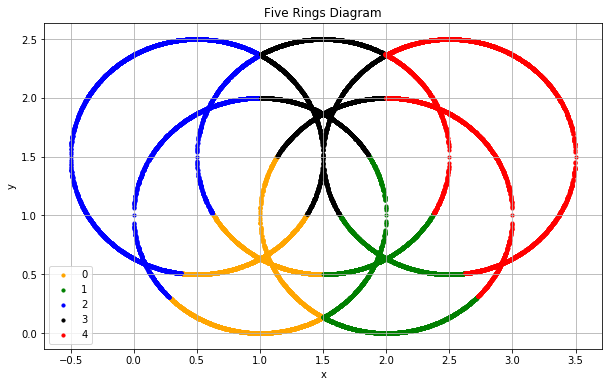

In [200]:
print("1(d)")
color=['orange','green','blue','black','red']
plt.figure(figsize=(10,6))
ring_0=np.where(PredictedLabel==0)
plt.scatter(fiveRingDataFrame.x.iloc[ring_0[0]],fiveRingDataFrame.y.iloc[ring_0[0]],c=color[0],label=0,s=10)
ring_1=np.where(PredictedLabel==1)
plt.scatter(fiveRingDataFrame.x.iloc[ring_1[0]],fiveRingDataFrame.y.iloc[ring_1[0]],c=color[1],label=1,s=10)
ring_2=np.where(PredictedLabel==2)
plt.scatter(fiveRingDataFrame.x.iloc[ring_2[0]],fiveRingDataFrame.y.iloc[ring_2[0]],c=color[2],label=2,s=10)
ring_3=np.where(PredictedLabel==3)
plt.scatter(fiveRingDataFrame.x.iloc[ring_3[0]],fiveRingDataFrame.y.iloc[ring_3[0]],c=color[3],label=3,s=10)
ring_4=np.where(PredictedLabel==4)
plt.scatter(fiveRingDataFrame.x.iloc[ring_4[0]],fiveRingDataFrame.y.iloc[ring_4[0]],c=color[4],label=4,s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Five Rings Diagram")
plt.grid()
plt.axis(aspect='equal')
plt.legend()
plt.show()

In [201]:
print("1(f)")

def bootStrap_picture(fiveRingDF,PredictedLabel):
    
    color=['orange','green','blue','black','red']
    plt.figure(figsize=(10,6))
    ring_0=np.where(PredictedLabel==0)
    plt.scatter(fiveRingDF.x.iloc[ring_0[0]],fiveRingDF.y.iloc[ring_0[0]],c=color[0],label=0,s=10)
    ring_1=np.where(PredictedLabel==1)
    plt.scatter(fiveRingDF.x.iloc[ring_1[0]],fiveRingDF.y.iloc[ring_1[0]],c=color[1],label=1,s=10)
    ring_2=np.where(PredictedLabel==2)
    plt.scatter(fiveRingDF.x.iloc[ring_2[0]],fiveRingDF.y.iloc[ring_2[0]],c=color[2],label=2,s=10)
    ring_3=np.where(PredictedLabel==3)
    plt.scatter(fiveRingDF.x.iloc[ring_3[0]],fiveRingDF.y.iloc[ring_3[0]],c=color[3],label=3,s=10)
    ring_4=np.where(PredictedLabel==4)
    plt.scatter(fiveRingDF.x.iloc[ring_4[0]],fiveRingDF.y.iloc[ring_4[0]],c=color[4],label=4,s=10)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Five Rings Diagram")
    plt.grid()
    plt.axis(aspect='equal')
    plt.legend()
    plt.show()

1(f)


In [202]:
print("1(e)")

def sample_wr (inData):
    n = len(inData)
    outData = np.empty((n,1))
    for i in range(n):
        j = int(random.random() * n)
        outData[i] = inData[j]
    return outData

1(e)


In [203]:
# Build a classification tree for the bootstrap samples
def bootstrap_MnLogistic (x_train, y_train, nB):
    Accuracy=0    
    Misclassification=0
    RASE_test=0
    ActualLabel=y_train
    x_index = x_train.index
    nT = len(y_train)
    
    logisticModel = LogisticRegression(random_state=20190430, solver='newton-cg',multi_class='multinomial')

    # Initialize internal state of the random number generator.
    random.seed(20190430)
    for iB in range(nB):
        bootIndex = sample_wr(x_index)
        x_train_boot = x_train.loc[bootIndex[:,0]]
        y_train_boot = y_train.loc[bootIndex[:,0]]
        
        logisticFit=logisticModel.fit(x_train_boot,y_train_boot)
        
#         PredictedProb= logisticModel.predict(x_train)
        PredictedProb=pd.DataFrame(logisticModel.predict_proba(x_train))
        
        PredictedLabel= pd.to_numeric(PredictedProb.idxmax(axis=1))
        
        RASE_test+=RASE_NEW(PredictedProb,PredictedLabel,fiveRingDataFrame['ring'])
        
        Accuracy+=metrics.accuracy_score(ActualLabel,PredictedLabel)
#         print(Accuracy)
        
    RASE_test=RASE_test/nB
    Accuracy=Accuracy/nB
    Misclassification=1-Accuracy
    print("Average RASE of",nB,"bags",round(RASE_test,7))
    print("Average misclassification of",nB,"bags",round(Misclassification,7))
    print("Average accuracy of",nB,"bags",round(Accuracy,7))
    bootStrap_picture(x_train,PredictedLabel)

In [204]:
X=fiveRingDataFrame[[ 'x','y']]

Y=fiveRingDataFrame['ring']

logisticModel = LogisticRegression(random_state=20190430, solver='newton-cg',multi_class='multinomial')

logisticFit=logisticModel.fit(X,Y)

PredictedProb=logisticModel.predict_proba(X)

PredictedLabel=logisticModel.predict(X)

PredictedProb=pd.DataFrame(PredictedProb)

print(PredictedProb)


              0         1         2         3         4
0      0.276147  0.003325  0.683083  0.037348  0.000097
1      0.267956  0.003244  0.690783  0.037918  0.000099
2      0.285477  0.003456  0.673867  0.037103  0.000096
3      0.266276  0.003233  0.692300  0.038092  0.000100
4      0.287723  0.003493  0.671596  0.037092  0.000097
5      0.264238  0.003222  0.694104  0.038335  0.000101
6      0.290638  0.003543  0.668622  0.037099  0.000097
7      0.263249  0.003218  0.694964  0.038468  0.000101
8      0.292135  0.003570  0.667085  0.037112  0.000097
9      0.263076  0.003217  0.695113  0.038492  0.000101
10     0.292402  0.003575  0.666810  0.037115  0.000097
11     0.262947  0.003217  0.695224  0.038511  0.000102
12     0.292603  0.003579  0.666603  0.037118  0.000097
13     0.261810  0.003213  0.696194  0.038680  0.000102
14     0.294418  0.003613  0.664727  0.037144  0.000098
15     0.260800  0.003211  0.697041  0.038844  0.000103
16     0.296101  0.003645  0.662980  0.037175  0

In [205]:
PredictedLabel= pd.to_numeric(PredictedProb.idxmax(axis=1))

print(PredictedLabel)

0        2
1        2
2        2
3        2
4        2
5        2
6        2
7        2
8        2
9        2
10       2
11       2
12       2
13       2
14       2
15       2
16       2
17       2
18       2
19       2
20       2
21       2
22       2
23       2
24       2
25       2
26       2
27       2
28       2
29       2
        ..
19980    4
19981    4
19982    4
19983    4
19984    4
19985    4
19986    4
19987    4
19988    4
19989    4
19990    4
19991    4
19992    4
19993    4
19994    4
19995    4
19996    4
19997    4
19998    4
19999    4
20000    4
20001    4
20002    4
20003    4
20004    4
20005    4
20006    4
20007    4
20008    4
20009    4
Length: 20010, dtype: int64


Average RASE of 10 bags 0.5582412
Average misclassification of 10 bags 0.588061
Average accuracy of 10 bags 0.411939


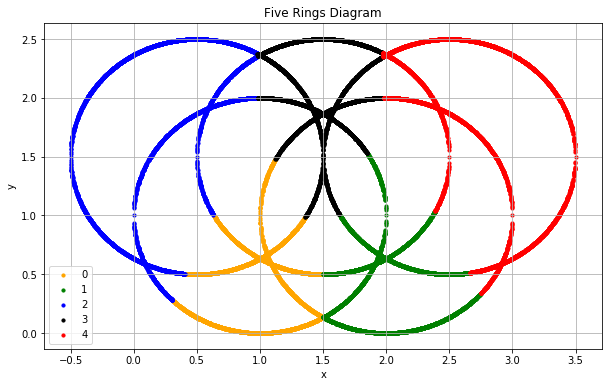

In [206]:
nB = 10

X=fiveRingDataFrame[[ 'x','y']]

Y=fiveRingDataFrame['ring']

logisticPredProb = bootstrap_MnLogistic (X,Y, nB)

Average RASE of 20 bags 0.5582039
Average misclassification of 20 bags 0.5878886
Average accuracy of 20 bags 0.4121114


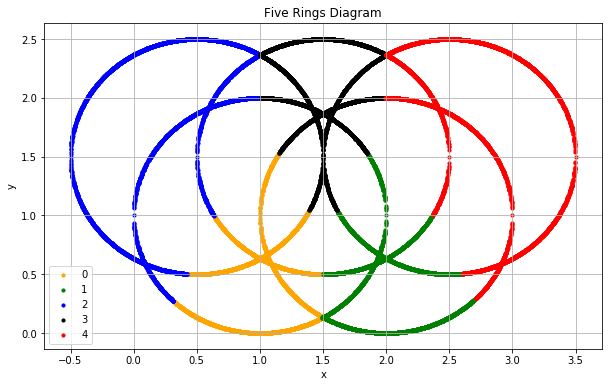

In [207]:
nB = 20

X=fiveRingDataFrame[[ 'x','y']]

Y=fiveRingDataFrame['ring']

logisticPredProb = bootstrap_MnLogistic (X,Y, nB)

Average RASE of 30 bags 0.5581898
Average misclassification of 30 bags 0.5877894
Average accuracy of 30 bags 0.4122106


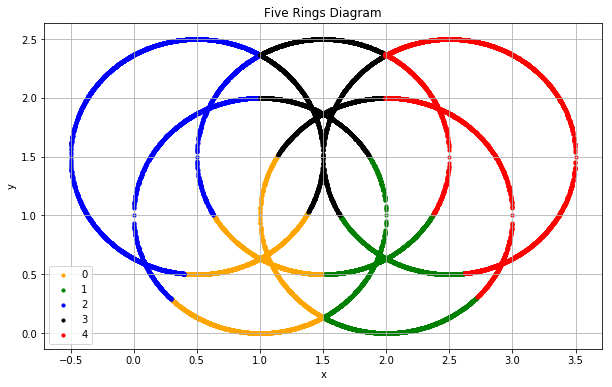

In [208]:
nB = 30

X=fiveRingDataFrame[[ 'x','y']]

Y=fiveRingDataFrame['ring']

logisticPredProb = bootstrap_MnLogistic (X,Y, nB)

Average RASE of 40 bags 0.5581915
Average misclassification of 40 bags 0.5877849
Average accuracy of 40 bags 0.4122151


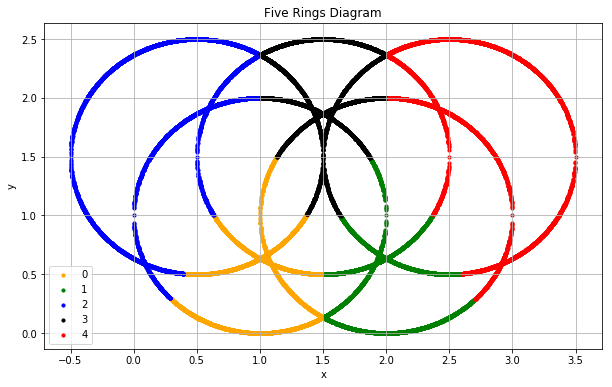

In [209]:
nB = 40

X=fiveRingDataFrame[[ 'x','y']]

Y=fiveRingDataFrame['ring']

logisticPredProb = bootstrap_MnLogistic (X,Y, nB)

Average RASE of 50 bags 0.5581952
Average misclassification of 50 bags 0.5878191
Average accuracy of 50 bags 0.4121809


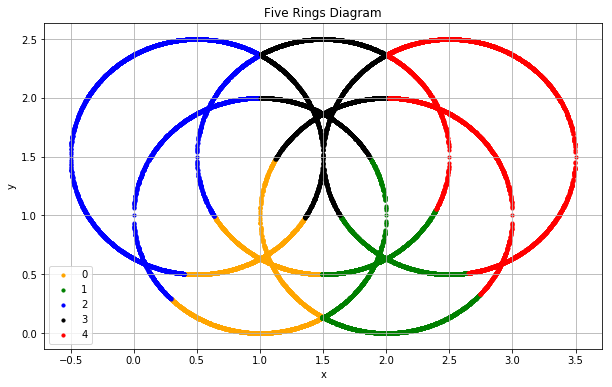

In [210]:
nB = 50

X=fiveRingDataFrame[[ 'x','y']]

Y=fiveRingDataFrame['ring']

logisticPredProb = bootstrap_MnLogistic (X,Y, nB)

Average RASE of 60 bags 0.5581997
Average misclassification of 60 bags 0.5878236
Average accuracy of 60 bags 0.4121764


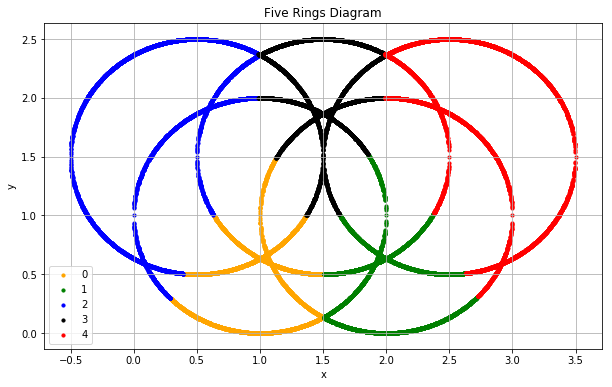

In [211]:
nB = 60

X=fiveRingDataFrame[[ 'x','y']]

Y=fiveRingDataFrame['ring']

logisticPredProb = bootstrap_MnLogistic (X,Y, nB)

Average RASE of 70 bags 0.5582007
Average misclassification of 70 bags 0.5878261
Average accuracy of 70 bags 0.4121739


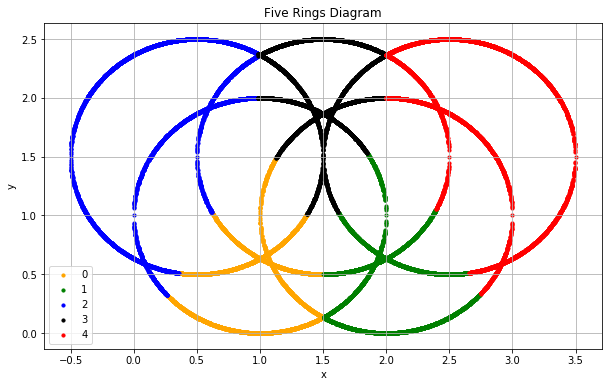

In [212]:
nB = 70

X=fiveRingDataFrame[[ 'x','y']]

Y=fiveRingDataFrame['ring']

logisticPredProb = bootstrap_MnLogistic (X,Y, nB)

Average RASE of 80 bags 0.5582044
Average misclassification of 80 bags 0.587848
Average accuracy of 80 bags 0.412152


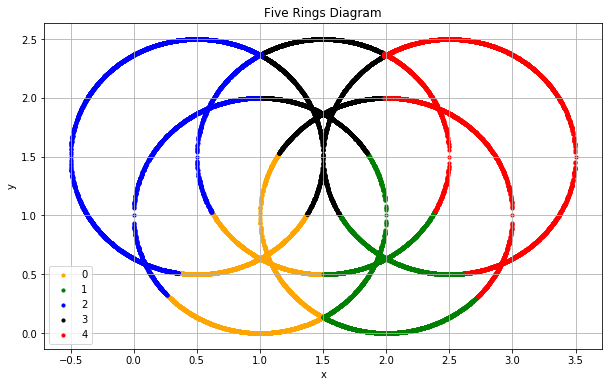

In [213]:
nB = 80

X=fiveRingDataFrame[[ 'x','y']]

Y=fiveRingDataFrame['ring']

logisticPredProb = bootstrap_MnLogistic (X,Y, nB)

Average RASE of 90 bags 0.5582037
Average misclassification of 90 bags 0.5878278
Average accuracy of 90 bags 0.4121722


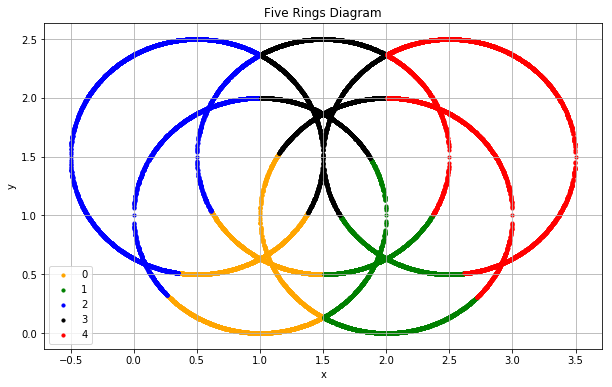

In [214]:
nB = 90

X=fiveRingDataFrame[[ 'x','y']]

Y=fiveRingDataFrame['ring']

logisticPredProb = bootstrap_MnLogistic (X,Y, nB)

Average RASE of 100 bags 0.5582024
Average misclassification of 100 bags 0.5878131
Average accuracy of 100 bags 0.4121869


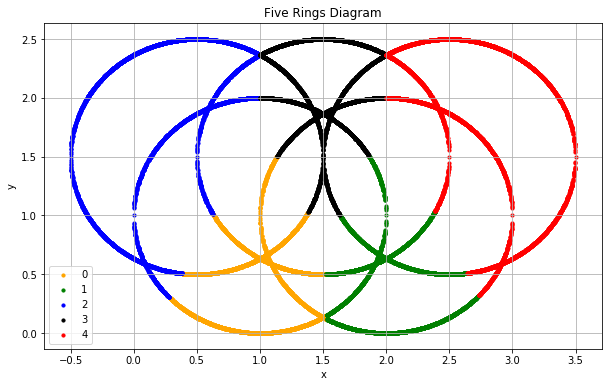

In [215]:
nB = 100

X=fiveRingDataFrame[[ 'x','y']]

Y=fiveRingDataFrame['ring']

logisticPredProb = bootstrap_MnLogistic (X,Y, nB)